In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Load the dataset
gold = pd.read_csv('processed_gold.csv')
usd_index = pd.read_csv('processed_usd_index.csv')
merged_gold_usd = pd.read_csv('merged_gold_usd.csv')
grouped_monthly_gold = pd.read_csv('grouped_monthly_gold.csv')

In [39]:
# Perform summary statistics
gold.head(5)

,Date,Open,High,Low,Gold Price,Adj Close,Volume,SMA_50,SMA_100,SMA_200
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0,NaN,NaN,NaN
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0,NaN,NaN,NaN
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0,NaN,NaN,NaN
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2,NaN,NaN,NaN
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0,NaN,NaN,NaN


In [40]:
gold_grouped_monthly.head(5)

Date,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.099991,273.389996,269.809090,265.874997,271.515005
2001,265.371427,261.805263,262.290907,261.079997,272.077272,270.714286,267.523811,272.895651,284.962502,283.378260,276.109999,276.005265
2002,281.747617,296.215793,294.375002,303.500001,314.627274,321.130003,313.280955,310.149999,319.595000,316.269567,319.115790,334.938094
2003,358.190478,358.536841,339.923811,329.285714,355.928571,356.485715,351.118185,360.576192,379.366667,378.930437,389.888889,408.800002
2004,414.726317,403.952630,407.469565,403.957142,383.769995,392.185715,398.352381,401.890907,406.233333,421.023811,438.654999,442.714283


In [94]:
### Creating a filtered data frame to group annual stats
gold_per_year = gold[['Date', 'Gold Price', 'High', 'Low']].copy()
gold_per_year['Date'] = pd.to_datetime(gold_per_year['Date'])
gold_per_year.set_index('Date', inplace = True)


### Grouping by year and finding average of close price, max of highs and minimum of lows per-annum
annual_stats = gold_per_year.groupby(pd.Grouper(freq='Y')).agg({
    'Gold Price': 'mean', 
    'High' : 'max', 
    'Low': 'min'
})

#reset index in order to configure the date column
annual_stats = annual_stats.reset_index()
annual_stats['Date'] = annual_stats['Date'].dt.year #only want to show the year, not the entire date
annual_stats.columns = ['Year', 'Annual Average Close', 'Annual High', 'Annual Low'] #Naming the columns which will be used for percent change

#finding percent change from year to year
annual_stats['Price Change YoY'] = annual_stats['Annual Average Close'].pct_change() * 100


annual_stats = annual_stats[['Year', 'Annual Average Close', 'Price Change YoY', 'Annual High', 'Annual Low']]

### Making percent change visually represented by red for negative percent change, green for positive percent change
def color_negative_red(val):
    color = 'red' if val < 0 else 'green'
    return f'color: {color}'
styled_annual_stats = annual_stats.style.format({
    'Yearly Average Close': '{:.2f}',
    'Annual High': '{:.2f}',
    'Annual Low': '{:.2f}',
    'Price Change YoY': '{:.2f}%'
}).map(color_negative_red, subset = ['Price Change YoY']).set_table_styles([
    {
        'selector': 'th',
        'props': [('border', '1px solid black')]
    },
    {
        'selector': 'td',
        'props': [('border', '1px solid black')]
    }
])

styled_annual_stats

,Year,Annual Average Close,Price Change YoY,Annual High,Annual Low
0,2000,270.280952,nan%,278.40,263.90
1,2001,271.043724,0.28%,294.00,255.00
2,2002,310.475601,14.55%,350.50,278.10
3,2003,363.719601,17.15%,417.20,319.30
4,2004,409.520481,12.59%,456.50,375.80
5,2005,445.271774,8.73%,538.50,410.10
6,2006,604.216402,35.70%,723.00,518.60
7,2007,697.005157,15.36%,843.20,607.00
8,2008,870.982609,24.96%,1014.60,681.00
9,2009,974.149207,11.84%,1226.40,805.60


# Key Takeaways:
We see that gold is steadily increasing from year to year in terms of the overall average of the yearly prices also depicted by the rise in the maximum and minimum per year.

Gold prices spiked between 2005-2006 potentially due to geopolitical concerns with the west's battle against Iran as a nuclear power holder or with China's currency appreciating against the dollar (i.e. the weakening of the US dollar). All events lead to political uncertainty and fears of growing inflation.

The sudden drops in gold value between the years 2013-2015 can be accredited to the Federal Reserve of the USA issuing a statement where it will taper the quantitative easing program it established during the towards the 2008 financial crisis. the Quantitative Easing program can be described as FED buying large amounts of financial assets in order to funnel money into the economy to lower interest rates and promote trade/spending. As the economy started to show signs of recovery, the FED had announced its intentions to slowly ease off of the program which led to market volatility, an increase in interest rates, a stronger dollar and reduced inflation fears. This goes to say, considering gold is an inflation hedge, it became less attractive to long term investors and since the dollar became stronger, gold prices went down as seen with the negative correlation in the correlation matrix.

The surge in gold prices during 2020 can be attributed to the global Covid-19 pandemic which led the more economic uncertainty. Likewise, the US issued stimulus packages and another program of quantitative easing which led to fears of eventual rises in inflation and lowering of interests rates, all appealing to gold buyers. Another reason could be the weakening of the US dollar at the time which may drive gold prices lower momentarily, making it an attractive asset to foreigners, thus, raising the price.


By our yearly analyses;
1) gold prices have a negative correlation with the strength of the US dollar.
2) gold prices are directly effected by geopolitical concerns and tumult.
3) gold prices rise in anticipation of inflation and rise when interest rates drop.

In [45]:
#setting date as datetime object
gold['Date'] = pd.to_datetime(gold['Date'])

#set index for gold
gold.set_index(gold['Date'], inplace = True)

# Extract year from the index
gold['Year'] = gold.index.year


#Dictionary to convert Month numerical values to actual Name
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',
              9: 'September', 10: 'October', 11: 'November', 12: 'December'}

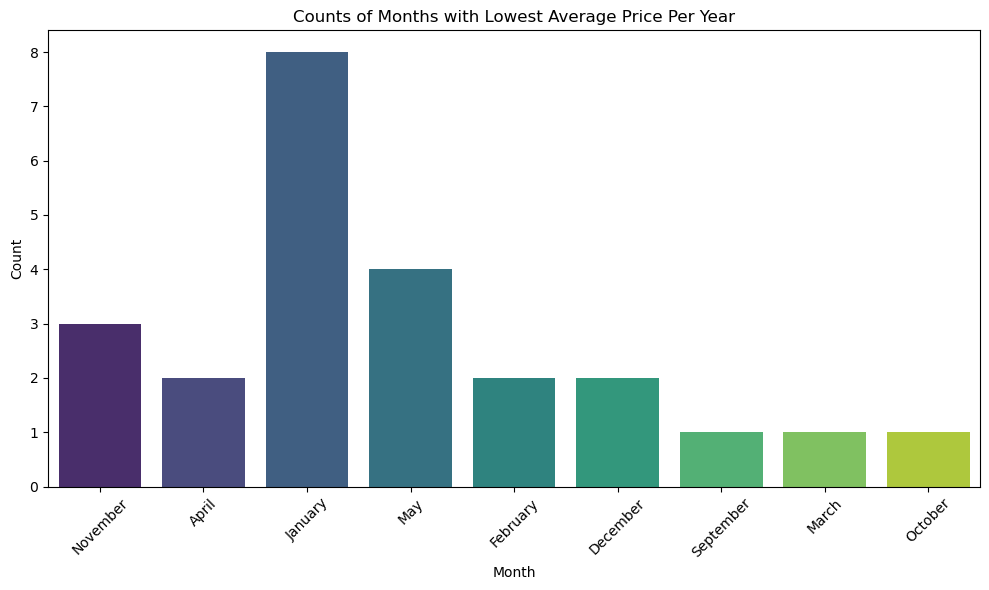

In [19]:
# Calculate average price for each month within each year
average_price_per_month_yearly = gold.groupby(['Year', gold.index.month])['Gold Price'].mean()

# Find the month with the lowest average price for each year
lowest_avg_price_month_per_year = average_price_per_month_yearly.groupby('Year').idxmin().apply(lambda x: month_names[x[1]])

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=lowest_avg_price_month_per_year, x=lowest_avg_price_month_per_year, palette="viridis")
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts of Months with Lowest Average Price Per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

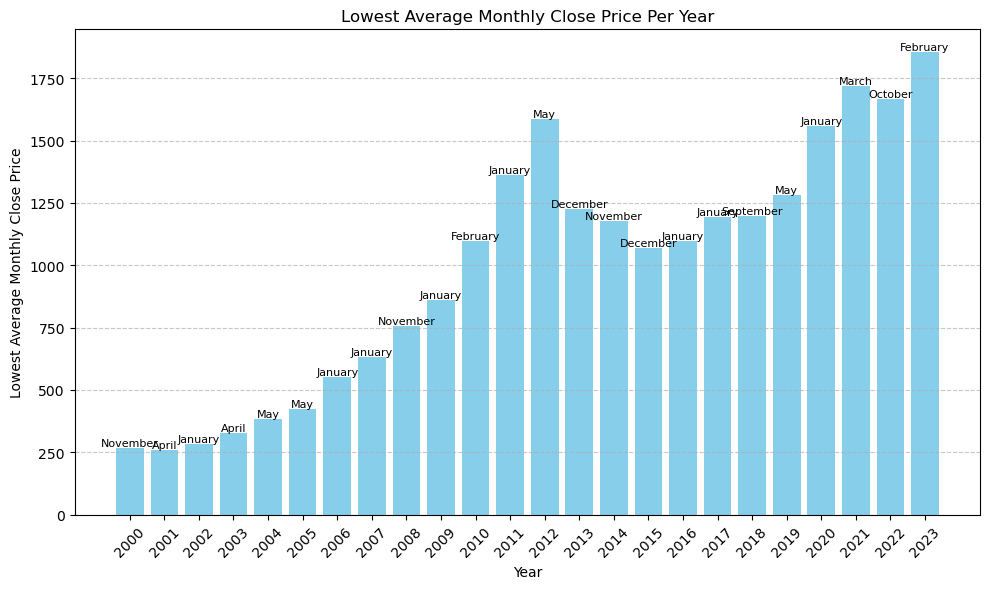

In [85]:
#Extracting year and month from Date index
gold['Year'] = gold.index.year
gold['Month'] = gold.index.month

#Group by year and month, calculating the average closing prices
monthly_avg = gold.groupby(['Year', 'Month'])['Gold Price'].mean().reset_index()

#find the month with the lowest average price for each year
min_avg_per_year = monthly_avg.loc[monthly_avg.groupby('Year')['Gold Price'].idxmin()]

#plotting the data
plt.figure(figsize=(10,6))

for idc,row in min_avg_per_year.iterrows():
    plt.bar(row['Year'], row['Gold Price'], label=f'{month_names[row["Month"]]}', color= 'skyblue')
    plt.text(row['Year'], row['Gold Price'], f'{month_names[row["Month"]]}', ha='center', va='bottom', fontsize = 8)

plt.xlabel('Year')
plt.ylabel('Lowest Average Monthly Close Price')
plt.title('Lowest Average Monthly Close Price Per Year')
plt.xticks(min_avg_per_year['Year'].unique(), rotation = 45)
plt.grid(axis='y', linestyle = '--', alpha = 0.7)
#plt.legend()
plt.tight_layout()
plt.show();

# Conclusions for Months With Lowest Annual Prices 
As we noticed a relative steady increase in gold prices throughout all years between 2000-2024, data showing January being the month with the lowest prices yearly is congruent with our analysis. One can also say the gold prices show seasonal tendencies given that some months are more prevalent than others.

Without taking January into consideration, we can see that May is a low month for gold prices presumably due to May coming after most of the holiday seasons.

India and China have high influence on gold prices and thus pertaining to gold seasonality trends we can see that India's festivals such as Diwali (October-November) and Akshaya Tritiya (April-May) exhaust the gold market potentially effecting gold prices and making them more stagnant/low in the months of January/May. Likewise, Chinese New Year usually takes place in January and thus driving demand for gold prior to January, leaving the month void of buyers.

Economic data releases at the end of the year (Q4) can also play a potential role in company/market reevaluation, making portfolio adjustments and selling off of gold.

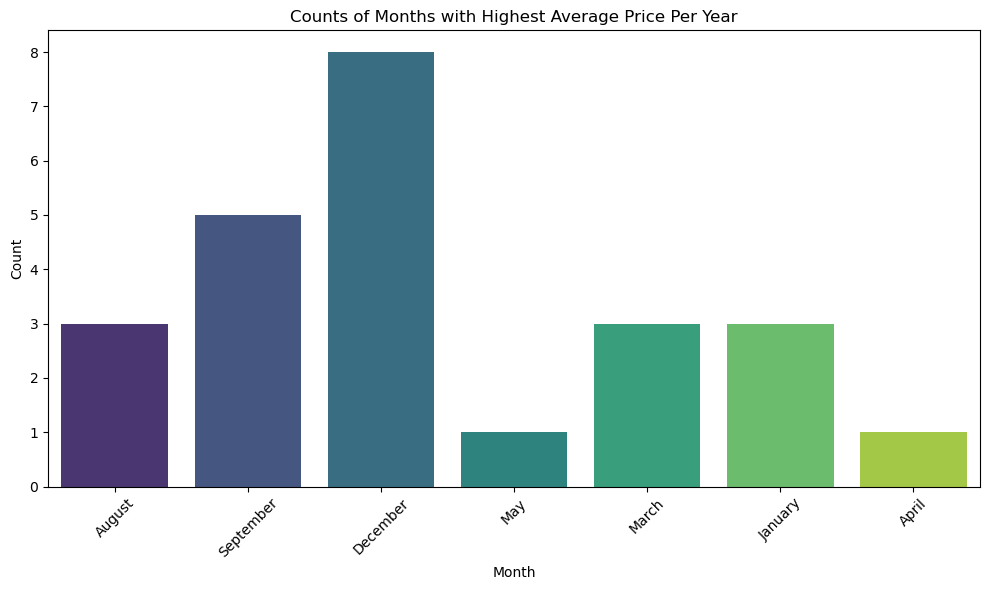

In [20]:
# Calculate average price for each month within each year
average_price_per_month_yearly = gold.groupby(['Year', gold.index.month])['Gold Price'].mean()

# Find the month with the lowest average price for each year
lowest_avg_price_month_per_year = average_price_per_month_yearly.groupby('Year').idxmax().apply(lambda x: month_names[x[1]])

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=lowest_avg_price_month_per_year, x=lowest_avg_price_month_per_year, palette="viridis")
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts of Months with Highest Average Price Per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Months with highest average prices per year are December and September.

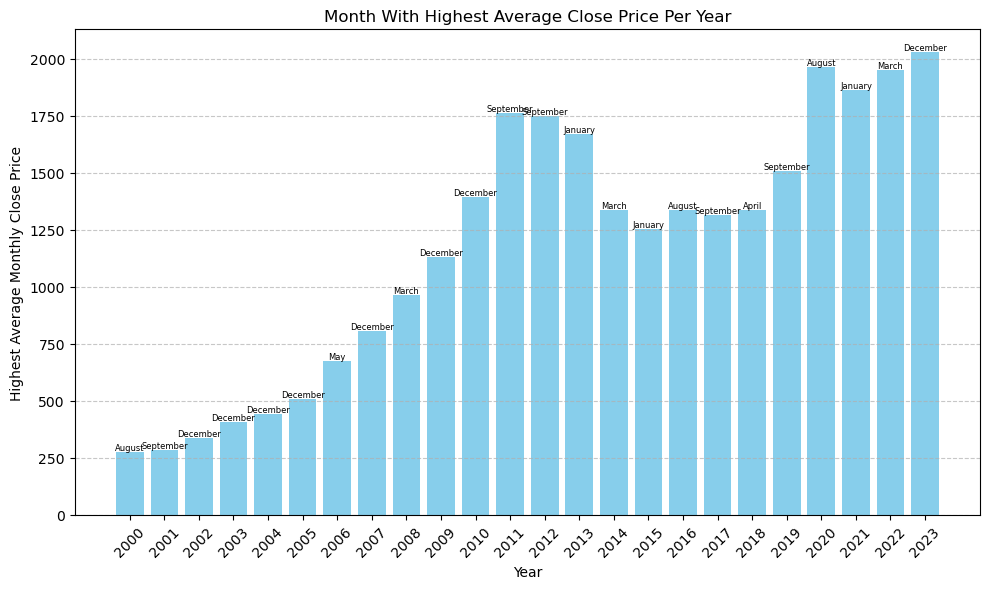

In [90]:
#find the exact same graph but having months of highest prices per year and plot both graphs side by side
max_avg_per_year = monthly_avg.loc[monthly_avg.groupby('Year')['Gold Price'].idxmax()]


plt.figure(figsize=(10,6))
#plotting
for idx,row in max_avg_per_year.iterrows():
    plt.bar(row['Year'], row['Gold Price'], label=f'{month_names[row["Month"]]}', color= 'skyblue')
    plt.text(row['Year'], row['Gold Price'], f'{month_names[row["Month"]]}', ha='center', va='bottom', fontsize = 6)

plt.xlabel('Year')
plt.ylabel('Highest Average Monthly Close Price')
plt.title('Month With Highest Average Close Price Per Year')
plt.xticks(max_avg_per_year['Year'].unique(), rotation = 45)
plt.grid(axis='y', linestyle = '--', alpha = 0.7)
#plt.legend()
plt.tight_layout()
plt.show();

# Conclusions for Months With Highest Annual Prices

Highest average prices are noted to be in the months of December, September, and August respectively. It is important to take seasonality and influences such as holidays into account.

3 major infleuncers of gold prices are India, China and the western countries as stated before.
1) India - notable holidays/seasons; Raksha Bandhan festival in August, Diwali in November, and the wedding seasons usually starting in october and ending near December.
2) China - preparations for Chinese New Year which falls in January or February are usually started in December.
3) Western Countries - Christmas, Hannukah and New Year fall around December/January leading to major purchasing

altogether, we must pay attention to seasonality and assume that other investors paying attention to the seasonality will also invest in the given months further driving prices upwards.

/var/folders/n0/l3mnbs355vv437zzwqt4cx6r0000gn/T/ipykernel_16801/3183263281.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{percent_occurrences_per_month[i]:.1f}%',


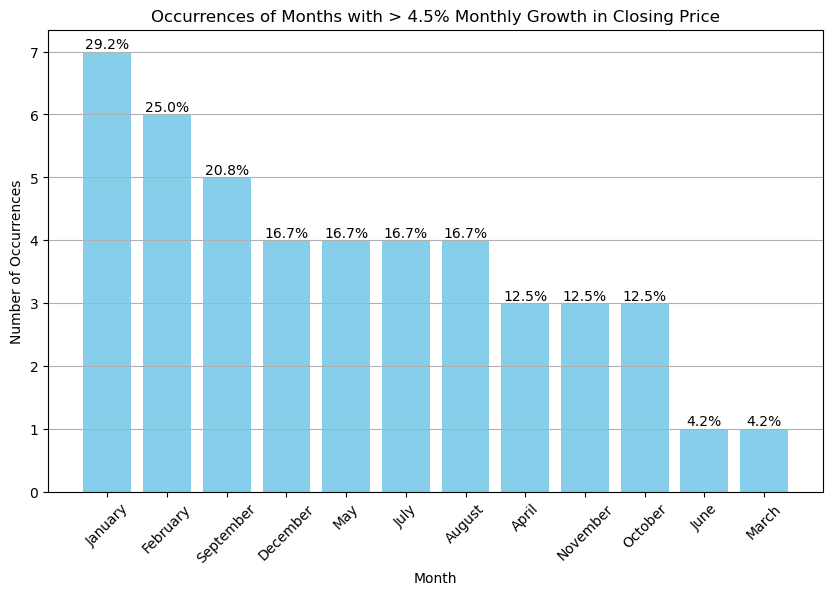

In [56]:
# Calculate the total number of years in the dataset
total_years = gold_grouped_monthly['Year'].nunique()

#finding percent change per month
gold_grouped_monthly['Percent Change'] = (gold_grouped_monthly['Gold Price'].pct_change())*100

#find months with percent growth above 4.5% 
threshold = 4.5
months_surpassing_threshold = gold_grouped_monthly[gold_grouped_monthly['Percent Change'] > threshold]

#count number of occurences of each month irrelevant to the year
month_counts = months_surpassing_threshold.index.to_period("M").month.map(month_names).value_counts()

# Calculate the percentage occurrence for each month
percent_occurrences_per_month = (month_counts / total_years) * 100

# Create the bar plot
plt.figure(figsize=(10,6))
bars = plt.bar(month_counts.index, month_counts.values, color='skyblue')

# Add labels on top of each bar with the percentage occurrence
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{percent_occurrences_per_month[i]:.1f}%', 
             ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Months with > 4.5% Monthly Growth in Closing Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show();

# Percent Change on a Month to Month Basis
This graph depicts the percent change of absolute prices from month to month throughout all years. 

We can see that relative to the prior month of December, January is seen as the most probably to show a humble rise of 4.5% or greater in stock prices followed by february in close second. This corroborates with our data in the short-term aspect as we have seen that gold prices show a steady increase throughout most if not all of the years, thus, even though December is usually a month where gold is of the highest value, we can still expect to see a steady rise in gold prices following into January. 

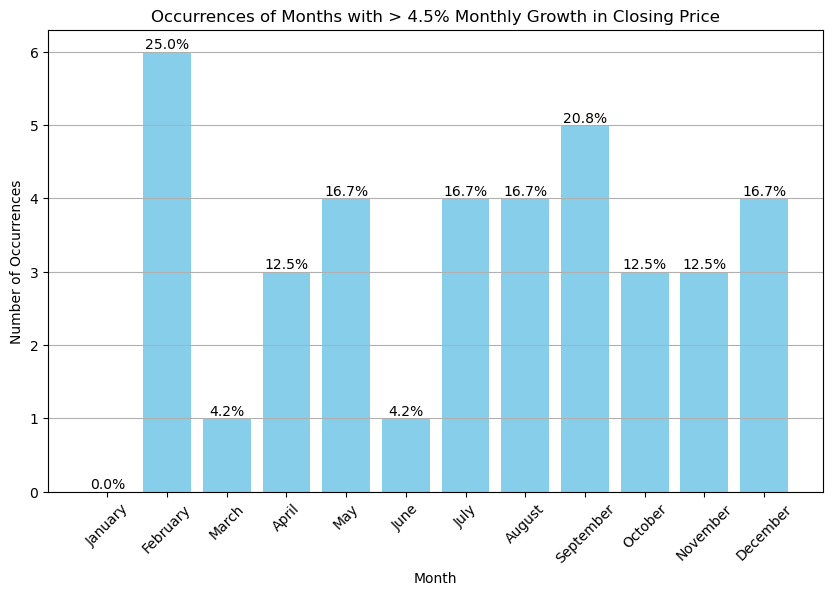

In [46]:
# Calculate the percentage change per month for each year
gold['Year'] = gold.index.year
total_years = gold['Year'].nunique()

gold_grouped_monthly = gold.groupby(['Year', gold.index.month])['Gold Price'].mean().unstack()

# Calculate the percentage change for each month across different years
percent_change_per_month = gold_grouped_monthly.pct_change(axis='columns') * 100

# Find months with percent growth above the threshold
threshold = 4.5
months_surpassing_threshold = percent_change_per_month[percent_change_per_month > threshold]

# Count occurrences of each month with percent growth above the threshold
month_counts = months_surpassing_threshold.count()
percentage_occurrences_per_month = (month_counts/total_years) * 100


# Create a bar plot
plt.figure(figsize=(10,6))
bars = plt.bar(month_counts.index.map(month_names), month_counts.values, color='skyblue')

# Label each bar with the respective percentage
for bar, label in zip(bars, percentage_occurrences_per_month.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label:.1f}%', 
             ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Months with > 4.5% Monthly Growth in Closing Price per Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Percent Change Between Months Within a Given Year
This graph depicts percent changes on a per-year basis.

We see that with 25% certainty, February is said to see a percent change in gold closing prices 4.5% above that in January (this can Corroborate with our previous data showing January to be of the months with historically the lowest prices out of the year). We can also note August and September being of higher probability to experience a percent change above 4.5% as they were the months to on average also hold higher closing prices.

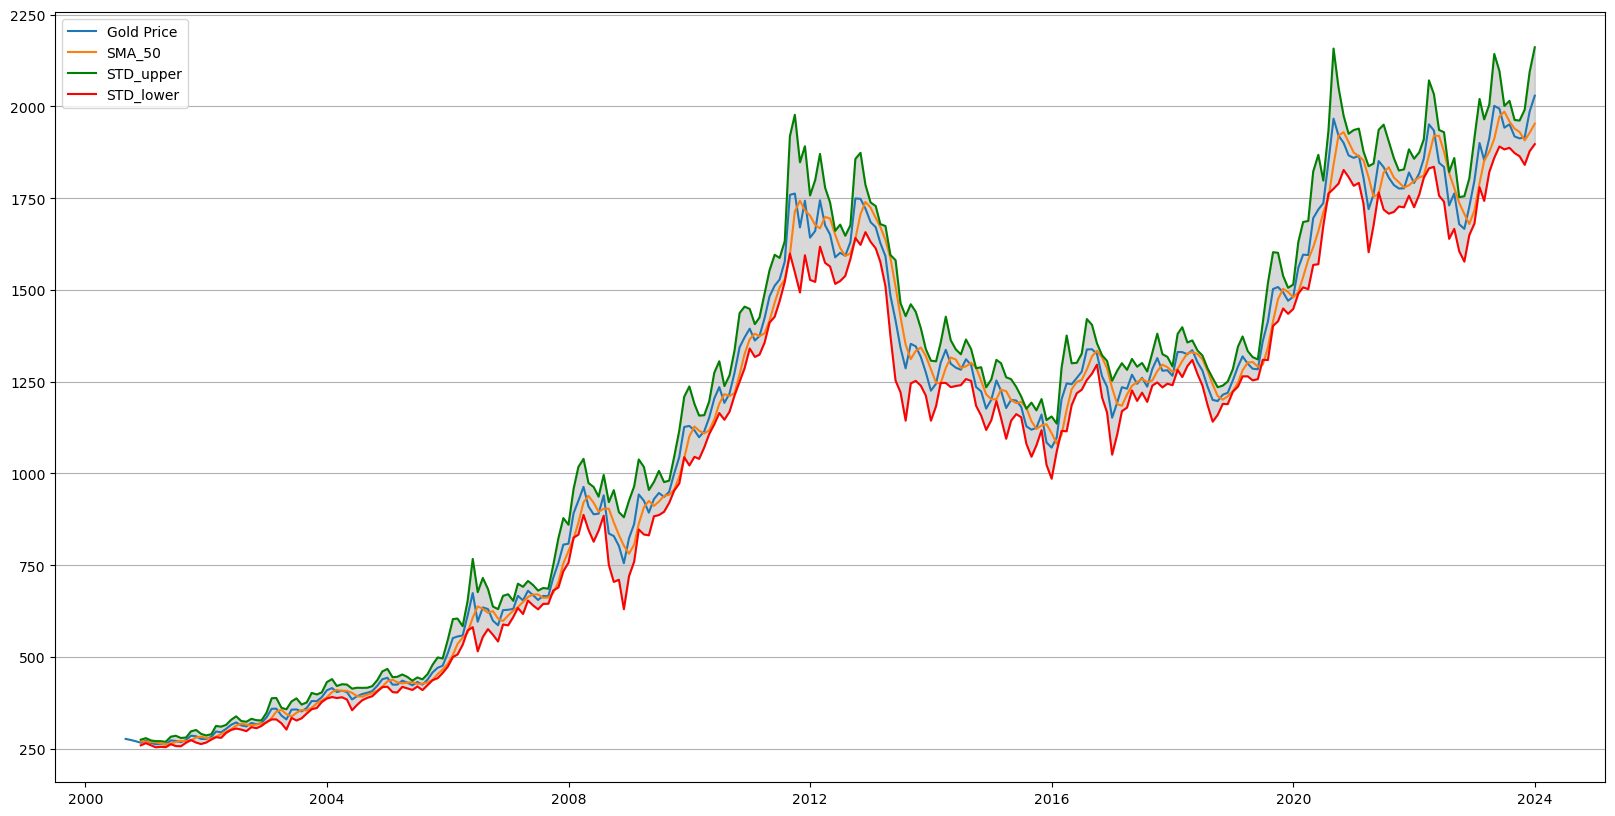

In [96]:
#creating bollinger bands of 2 standard deviations

gold['STD'] = gold['Gold Price'].rolling(window=50).std()
num_std = 2

gold['upper_band'] = gold['Gold Price'] + (num_std * gold['STD'])
gold['lower_band'] = gold['Gold Price'] - (num_std * gold['STD'])

gold_grouped_monthly = gold.groupby(pd.Grouper(freq='M')).mean()

#plotting SMA 50 with Bollinger Bands
x_values = gold_grouped_monthly.index
plt.figure(figsize = (20,10))
plt.plot(x_values, gold_grouped_monthly['Gold Price'], label = 'Gold Price')
plt.plot(x_values, gold_grouped_monthly['SMA_50'], label = 'SMA_50')
plt.plot(x_values, gold_grouped_monthly['upper_band'], label = 'STD_upper', color = 'green')
plt.plot(x_values, gold_grouped_monthly['lower_band'], label = 'STD_lower', color = 'red')

#creating a fill gradient between the upper and lower bounds
plt.fill_between(x_values, gold_grouped_monthly['upper_band'], gold_grouped_monthly['lower_band'], color = 'gray', alpha=0.3)
plt.legend()

plt.grid(axis = 'y')

plt.show()

# Simple Moving Average (SMA) and Bollinger Bands

A 50-day moving average is one typically used by financial analysts to smooth out market trends and understand price dynamics. SMA-50 is a medium-term indicator where if the price is consistently above the SMA, it can suggest an uptrend.
Bollinger Bands are typically 2 standard deviations above and below the SMA providing key insight into volatility, overbought/oversold stocks or indications of up/downtrends. Bands widening indicate higher volatility and bands widening indicate more stability.

Bollinger Bands are of importance as when the SMA lines touches the upper bound or the lower bound it signals an overbought stock or an oversold stock respectively. This in turn provides support and resistance to keep prices balanced. 

# Graph Interpretation
We see that on many accounts, the Gold Price is above that of the SMA indicating an uptrend yet when we near 2013/2014, the prices begin to push against the bounds of the upper bollinger band signaling potentially overbought stocks which can lead to eventual reversal in trends.

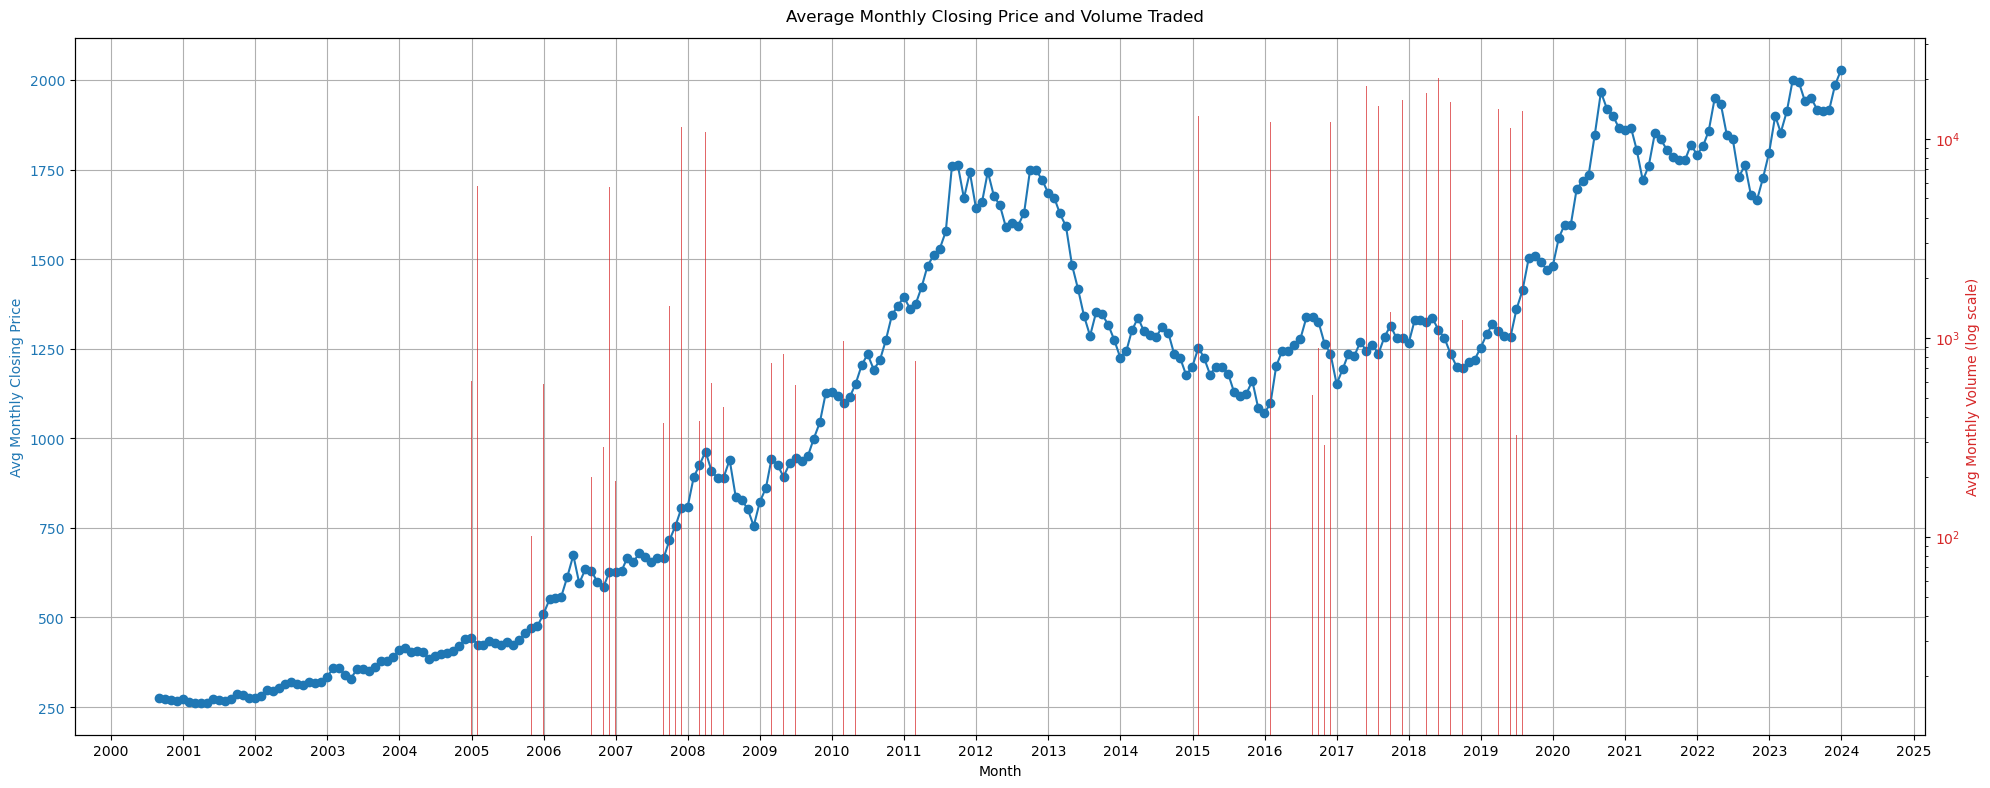

In [81]:
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator

# Create the plot with a secondary y-axis for the volume
fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot average closing price on the primary y-axis (line plot)
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Monthly Closing Price', color=color)
ax1.plot(gold_grouped_monthly.index, gold_grouped_monthly['Gold Price'], marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a secondary y-axis for the volume
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Avg Monthly Volume (log scale)', color=color)  # we already handled the x-label with ax1
ax2.bar(gold_grouped_monthly.index, gold_grouped_monthly['Volume'], color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')

date_format = DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_major_locator(YearLocator())
plt.xticks(rotation=45)
# Add a title
fig.suptitle('Average Monthly Closing Price and Volume Traded')

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

# Monthly Closing Prices vs Volume
Volume represents the total number of shares exchanged and high volume usually accompanies significant price movements. 
Low volume on the other hand indicates indecision in investors and weak participation in stock valueing. 

Usually, as stock values rise, so too does volume follow, likewise, there is usually little volume during a stark decline.

due to the y axis being on a log scale it would appear that other years have no volume traded at all, however, this is untrue.

All in all, volume is used as a support and trend indicator, if many people are trading during an uptrend may support the validity and strength of the price rise, confirming the uptrend. High volume also provides increase liquidity making it easier for investors to buy in and makes it difficuly for bears to push the price downwards.